In [5]:
# Set-up
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Path to the file
file_path = '/content/drive/MyDrive/fuel_econ.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head(11)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


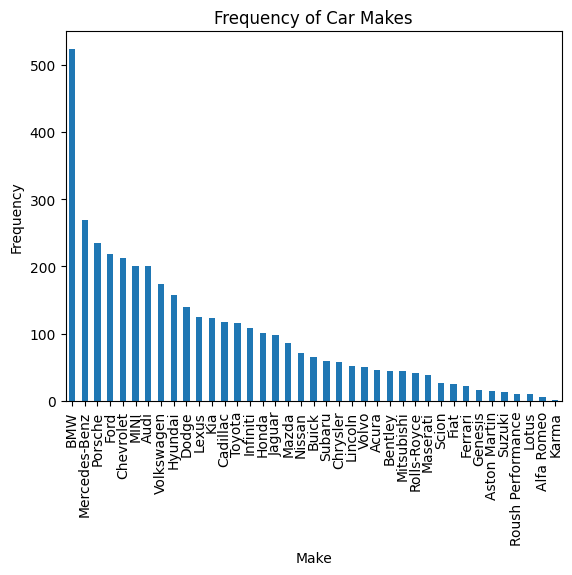

In [4]:
# Count the frequency of each make
make_counts = data['make'].value_counts()

# Plotting
make_counts.plot(kind='bar')
plt.title('Frequency of Car Makes')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.show()


# Interpretation.
The histogram shows that BMW's are the most common car make. Each bar corresponds to a specific make of car, and the height of the bar indicates how frequently that make appears in the dataset. T

<ipython-input-13-5c321ee32130>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


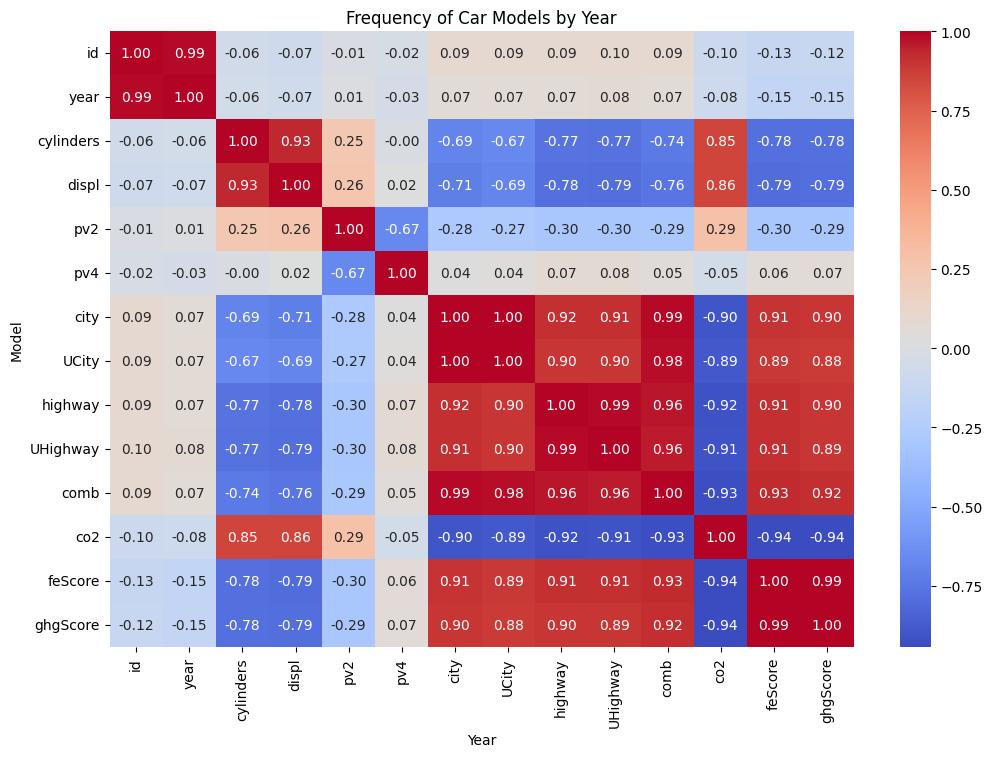

In [13]:
# Create a frequency table

# Compute the correlation matrix
corr_matrix = data.corr()


# Create the heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Frequency of Car Models by Year")
plt.ylabel('Model')
plt.xlabel('Year')
plt.show()

# Interpretation

The heatmap displays the correlation coefficients between different pairs of variables in the dataset. Each cell in the heatmap shows the correlation value (ranging from -1 to 1) between two variables, with the color intensity and annotation indicating the strength and nature (positive or negative) of the correlation. This visualization can help identify relationships and patterns among the variables.

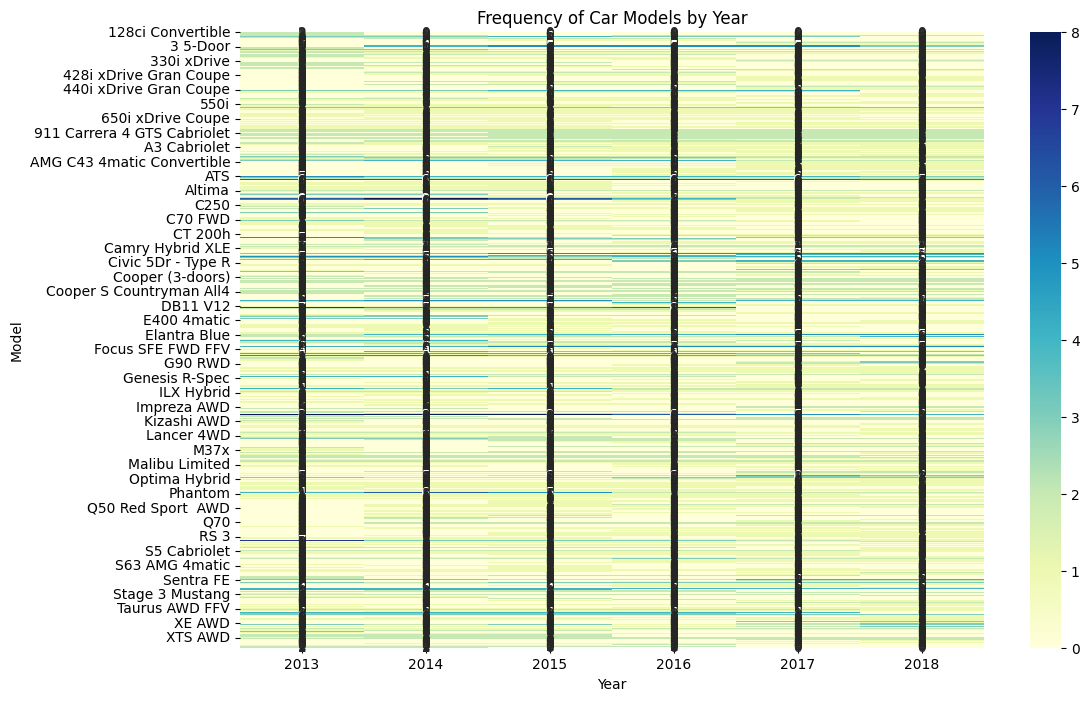

In [15]:
# Create a frequency table
frequency_table = pd.crosstab(data['model'], data['year'])

# Create the heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size as needed
sns.heatmap(frequency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Frequency of Car Models by Year")
plt.ylabel('Model')
plt.xlabel('Year')
plt.show()

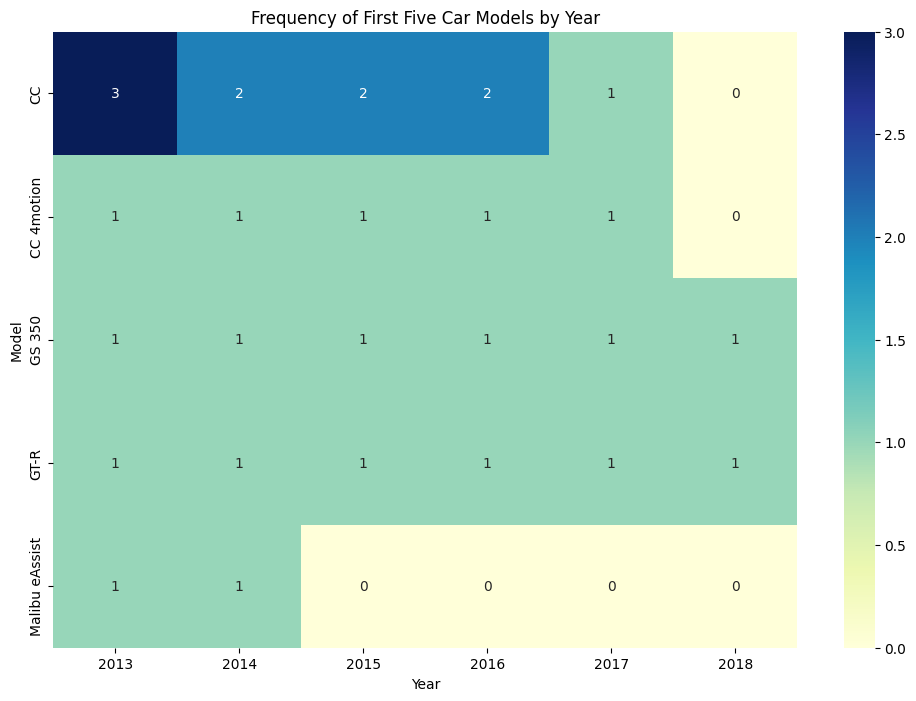

In [10]:
# Select only the first five car models to make sense of the intrepretation
# This assumes 'model' is a categorical variable and you want the first five unique models
unique_models = data['model'].unique()[:5]
filtered_data = data[data['model'].isin(unique_models)]

# Create a frequency table
frequency_table = pd.crosstab(filtered_data['model'], filtered_data['year'])

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(frequency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Frequency of First Five Car Models by Year")
plt.ylabel('Model')
plt.xlabel('Year')
plt.show()


# Interpretation.

The color intensity in each cell indicates the frequency (or count) of each model-year combination which ranges from Yellow (Yl) to Green (Gn) to Blue (Bu).
Darker shades of blue (or towards the blue end of the spectrum) suggest higher frequencies, while lighter shades (yellow or light green) indicate lower frequencies.
















